In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


In [132]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')


In [ ]:
#checking dataset

In [133]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [134]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [135]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#all parameter are found genuine and found no issue till now.Type are as they are and there is no null value here

In [136]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [ ]:
#checking occurance of data and found most of data is continous and multiple times repeated data is also present.

In [137]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [138]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# after using describe function further things found which found suspicious:
# mean data is each time higher than 50% of data.
#there is sudden differnce b/w 75%-100% data.
#std is high in free sulpher dioxide and total sulphur dioxide
#count is complete.

In [ ]:
#for further understanding plot colums and find issue. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

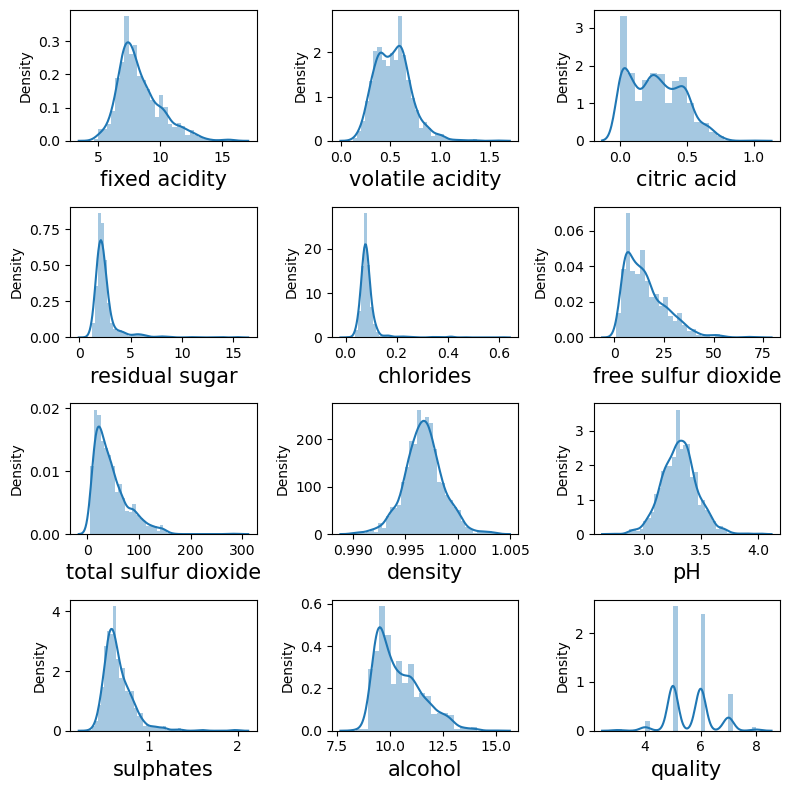

In [139]:
plt.figure(figsize=(8,8))
plotnumber=1

for column in df:
    if plotnumber <= 12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
#after ploting further things noticed:
#fixed acidity,volatile acidity, is some left skewed
#critic acid is also having some issue
#residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide, alcohol highly left skewed


In [ ]:
#i tried using skewness treatment and outlier and both at same time.
#But skewness will go highly negative while treating 
#So i decided to process with removing outliers.

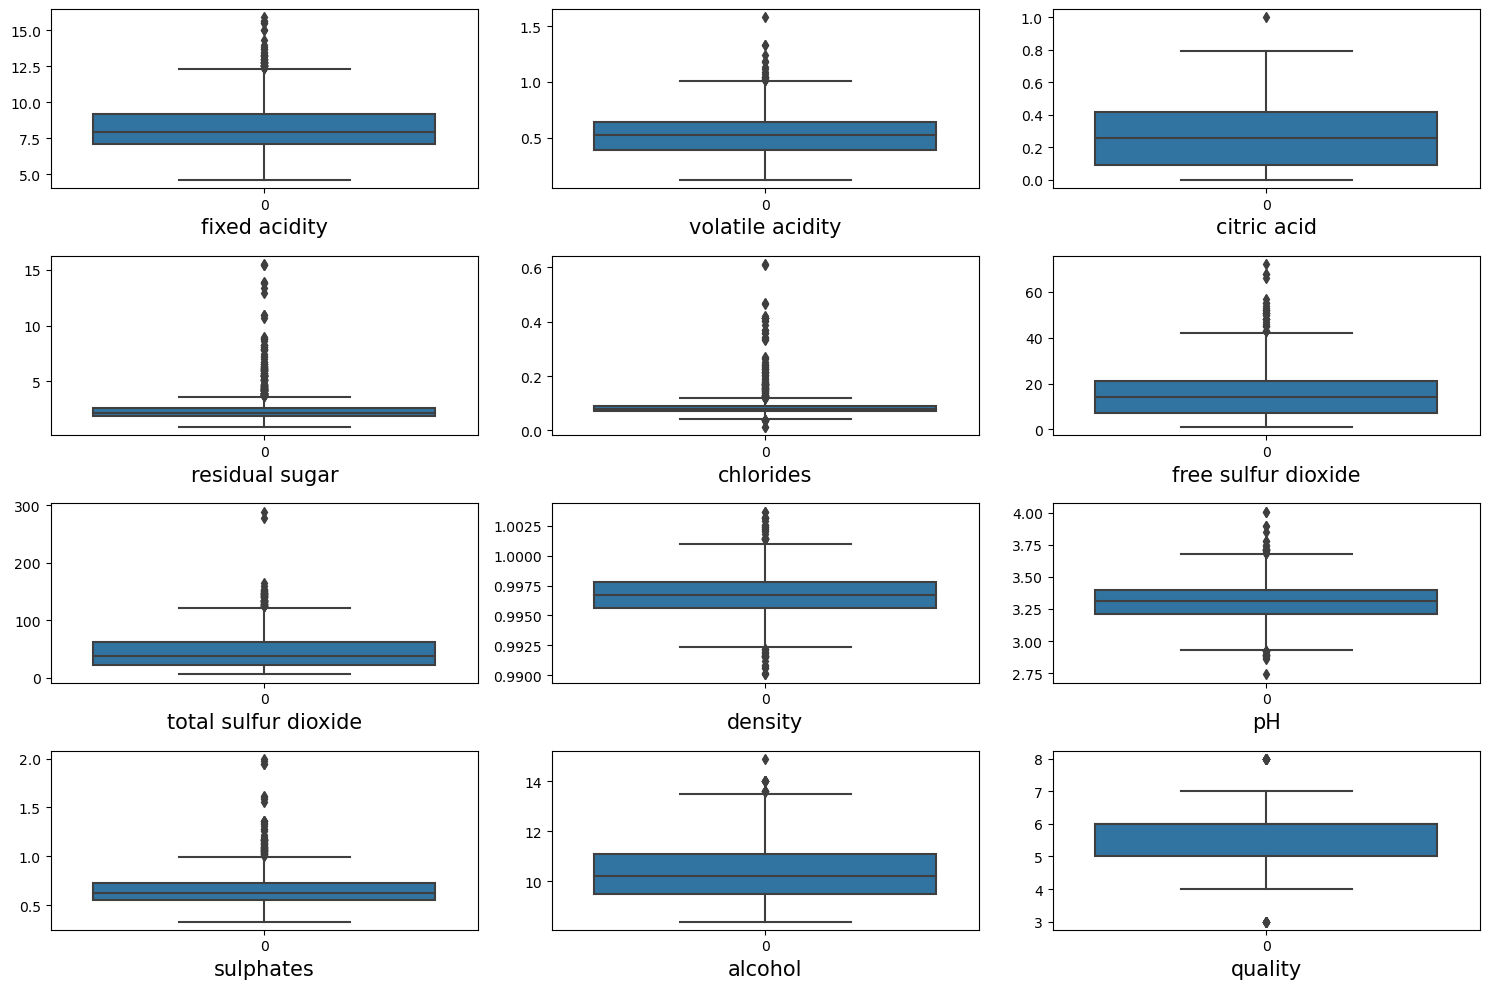

In [140]:
plt.figure(figsize=(15,10))
graph=1

for column in df:
    if graph<=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout()
plt.show()

In [141]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)


#and

iqr=q3-q1

In [142]:
print(q1)
print('\n')
print(q3)

fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.0900
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
quality                  5.0000
Name: 0.25, dtype: float64


fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.090000
free sulfur dioxide     21.000000
total sulfur dioxide    62.000000
density                  0.997835
pH                       3.400000
sulphates                0.730000
alcohol                 11.100000
quality                  6.000000
Name: 0.75, dtype: float64


In [143]:
rsd=(q3['residual sugar']+(1.5*iqr['residual sugar']))
print(rsd)

find=np.where(df['residual sugar']>rsd)
df=df.drop(df.index[find])
df.shape
df.reset_index()

3.6500000000000004


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1440,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1441,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1442,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [144]:
high_ch=(q3['chlorides']+(1.5*iqr['chlorides']))
print(high_ch)

find=np.where(df['chlorides']>high_ch)
df=df.drop(df.index[find])
df.shape
df.reset_index()

0.11999999999999998


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1355,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1356,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1357,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [145]:
low_ch=(q1['chlorides']-(1.5*iqr['chlorides']))
print(low_ch)

find=np.where(df['chlorides']<low_ch)
df=df.drop(df.index[find])
df.shape
df.reset_index()

0.04000000000000002


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1346,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1347,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1348,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [146]:
sd=(q3['free sulfur dioxide']+(1.5*iqr['free sulfur dioxide']))
print(sd)

find=np.where(df['free sulfur dioxide']>sd)
df=df.drop(df.index[find])
df.shape
df.reset_index()

42.0


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1330,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1331,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1332,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [147]:
tsd=(q3['total sulfur dioxide']+(1.5*iqr['total sulfur dioxide']))
print(tsd)

find=np.where(df['total sulfur dioxide']>tsd)
df=df.drop(df.index[find])
df.shape
df.reset_index()

122.0


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1293,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1294,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1295,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [148]:
spt=(q3['sulphates']+(1.5*iqr['sulphates']))
print(spt)

find=np.where(df['sulphates']>spt)
df=df.drop(df.index[find])
df.shape
df.reset_index()

0.9999999999999999


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1271,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1272,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1273,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#if i go with all outlier removal around 40% of data will be removed.
#So i just removed some data outlier and left some for less data to remove

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

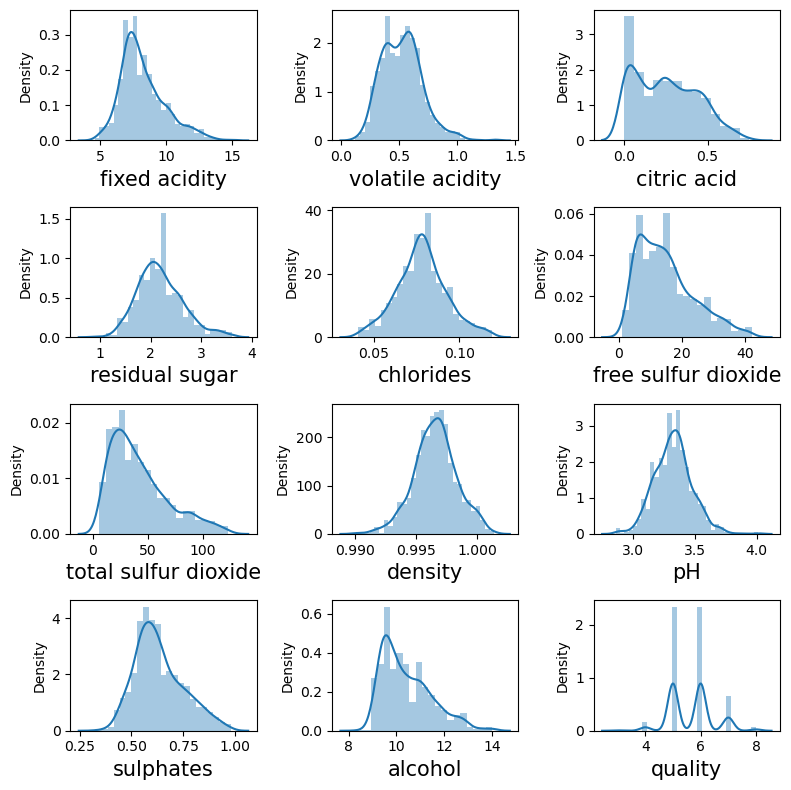

In [149]:
plt.figure(figsize=(8,8))
plotnumber=1

for column in df:
    if plotnumber <= 12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
#most of data is bell shaped after removal of outliers.so going further without much changment.

In [150]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.270818,0.695038,0.261882,0.222646,-0.156711,-0.111612,0.666830,-0.722587,0.168882,-0.138451,0.102071
volatile acidity,-0.270818,1.000000,-0.598524,0.021689,0.093742,-0.025785,0.077444,0.013323,0.249362,-0.329102,-0.182060,-0.370948
citric acid,0.695038,-0.598524,1.000000,0.183101,0.101735,-0.072529,-0.007013,0.371959,-0.524478,0.259703,0.067838,0.217671
residual sugar,0.261882,0.021689,0.183101,1.000000,0.263631,0.054234,0.161242,0.425677,-0.089831,0.072147,0.046290,0.005365
chlorides,0.222646,0.093742,0.101735,0.263631,1.000000,-0.008927,0.133371,0.437800,-0.212518,-0.076187,-0.340870,-0.186875
free sulfur dioxide,-0.156711,-0.025785,-0.072529,0.054234,-0.008927,1.000000,0.632572,-0.065574,0.128604,0.090657,0.003742,0.006395
total sulfur dioxide,-0.111612,0.077444,-0.007013,0.161242,0.133371,0.632572,1.000000,0.077320,0.027000,-0.047140,-0.183759,-0.168267
density,0.666830,0.013323,0.371959,0.425677,0.437800,-0.065574,0.077320,1.000000,-0.331001,0.085637,-0.588846,-0.220503
pH,-0.722587,0.249362,-0.524478,-0.089831,-0.212518,0.128604,0.027000,-0.331001,1.000000,0.006827,0.215507,-0.066867
sulphates,0.168882,-0.329102,0.259703,0.072147,-0.076187,0.090657,-0.047140,0.085637,0.006827,1.000000,0.254613,0.426530


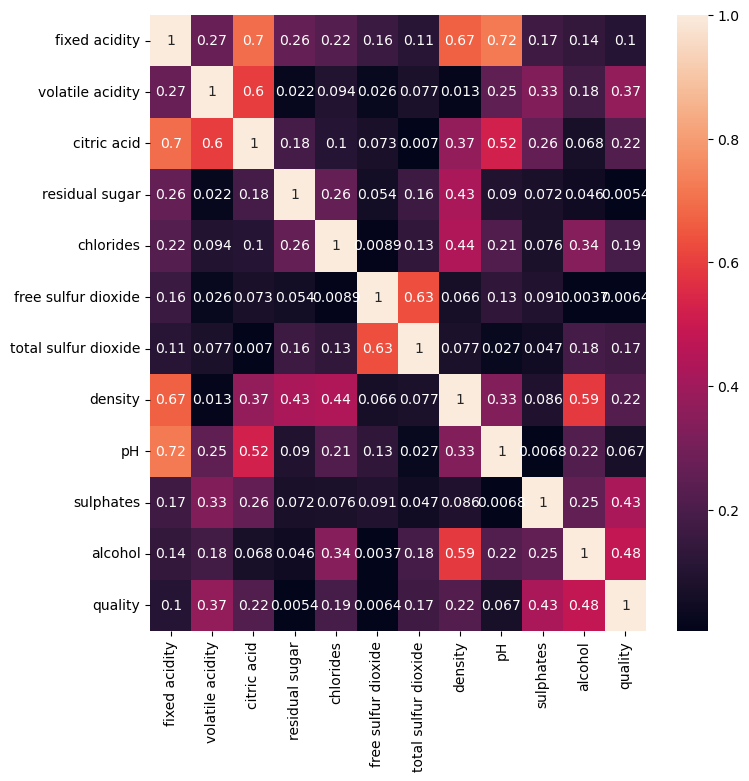

In [151]:
df_corr=df.corr().abs()

plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True,annot_kws={'size':10})
plt.show()

In [242]:
#checking corelation of feature and relation with target.
#alcohol have high relation with target.
# ph and density have high co-relation with fixed acidity

#for more confirmation i am going to use vif for better understanding

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [155]:
X=df.drop('quality',axis=1)
y=df['quality']

In [ ]:
#drop target and make seperate column

In [156]:
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [157]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=X.columns

In [158]:
vif

,vif,features
0,8.082359,fixed acidity
1,1.921885,volatile acidity
2,3.227205,citric acid
3,1.763748,residual sugar
4,1.343986,chlorides
5,1.818205,free sulfur dioxide
6,1.986214,total sulfur dioxide
7,8.117573,density
8,3.499594,pH
9,1.338272,sulphates


In [ ]:
#as we already found that ph and fixed acidity is having high co-relation.
#so going to drop density as it is having high value.

In [159]:
X=X.drop('density',axis=1)

In [160]:
scaled=scaler.fit_transform(X)

In [161]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=X.columns

In [162]:
vif

,vif,features
0,3.659291,fixed acidity
1,1.886027,volatile acidity
2,3.204093,citric acid
3,1.253731,residual sugar
4,1.277306,chlorides
5,1.816629,free sulfur dioxide
6,1.986187,total sulfur dioxide
7,2.336422,pH
8,1.256107,sulphates
9,1.385255,alcohol


In [ ]:
#after droping density we again check vif score distribution
#again fixed acidty and critic acid is having high relation
#again droping fixed acidity

In [163]:
X=X.drop('fixed acidity',axis=1)

In [164]:
scaled=scaler.fit_transform(X)

In [165]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=X.columns

In [166]:
vif

,vif,features
0,1.772754,volatile acidity
1,2.240411,citric acid
2,1.180396,residual sugar
3,1.276456,chlorides
4,1.812011,free sulfur dioxide
5,1.880117,total sulfur dioxide
6,1.561100,pH
7,1.218024,sulphates
8,1.348086,alcohol


In [ ]:
#now all data is normal and can process for train test split

In [167]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y, test_size=0.25,random_state=111)

In [ ]:
#treating imbalancing

In [233]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [236]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)  # You can specify a random seed for reproducibility
X_resampled, y_resampled = ros.fit_resample(x_train,y_train)

In [235]:
#samples which are less will now oversample for good model understanding

array([1, 1, 0, ..., 0, 0, 0])

In [237]:
dt=DecisionTreeClassifier()
dt.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

In [238]:
def metric_score(dt,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=dt.predict(x_train)
        print("\n-------------Train Result---------\n")
        print(f"Accuracy:{accuracy_score(y_train,y_pred)*100}%")
    elif train==False:
        pred=dt.predict(x_test)
        print("\n----------Test Score--------")
        print(f'Accuracy:{accuracy_score(y_test,pred)*100}%')
        print('\n \n Test Classifiacation Report \n',classification_report(y_test,pred,digits=2))

In [197]:
metric_score(dt,x_train,x_test,y_train,y_test, train=True)
metric_score(dt,x_train,x_test,y_train,y_test, train=False)


-------------Train Result---------

Accuracy:100.0%

----------Test Score--------
Accuracy:66.77115987460816%

 
 Test Classifiacation Report 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.77      0.69      0.73       134
           6       0.65      0.71      0.68       141
           7       0.51      0.56      0.54        34
           8       0.50      0.33      0.40         3

    accuracy                           0.67       319
   macro avg       0.49      0.46      0.47       319
weighted avg       0.67      0.67      0.67       319



In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn=KNeighborsClassifier()

In [239]:
knn.fit(X_resampled,y_resampled)

KNeighborsClassifier()

In [240]:
metric_score(knn,x_train,x_test,y_train,y_test, train=True)
metric_score(knn,x_train,x_test,y_train,y_test, train=False)


-------------Train Result---------

Accuracy:69.14225941422593%

----------Test Score--------
Accuracy:52.03761755485894%

 
 Test Classifiacation Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.11      0.29      0.16         7
           5       0.73      0.60      0.66       134
           6       0.58      0.43      0.50       141
           7       0.30      0.65      0.41        34
           8       0.10      0.33      0.15         3

    accuracy                           0.52       319
   macro avg       0.30      0.38      0.31       319
weighted avg       0.60      0.52      0.54       319



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [216]:
#i select 2 model decisiontree and knn and their results are not such satisfactory

In [251]:
import pickle 

pickle.dump(df,open('model1','wb'))